In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

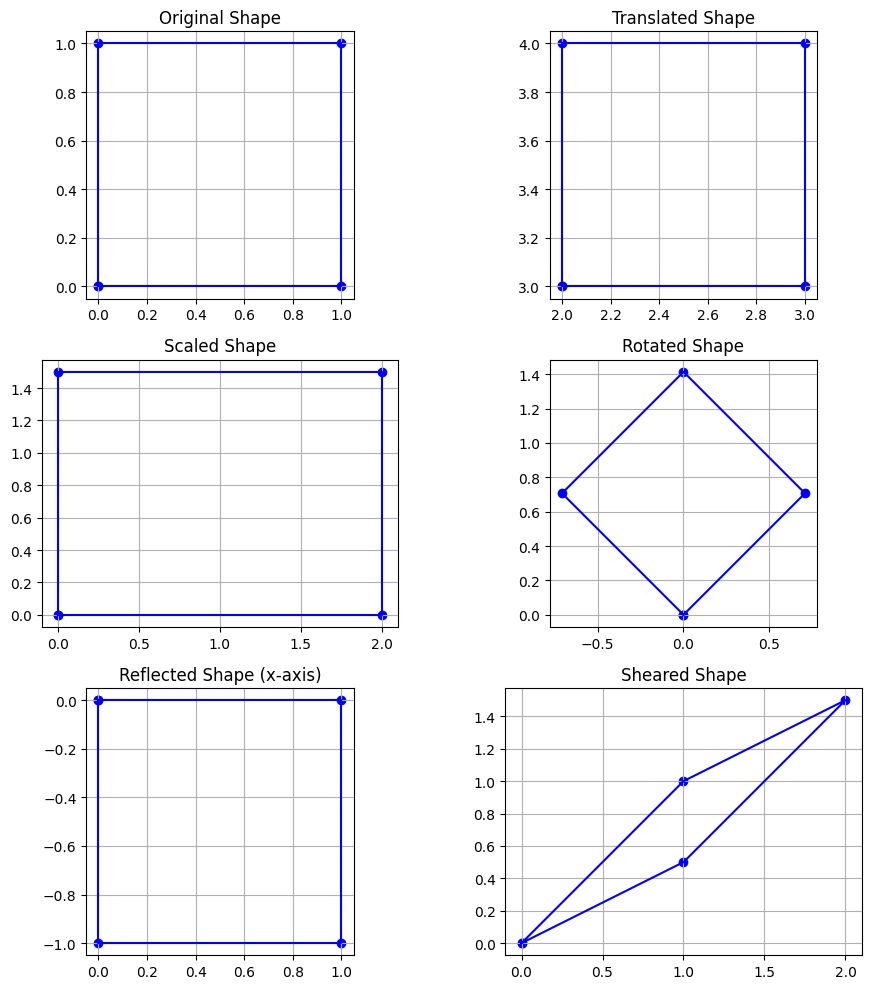

In [ ]:
def plot_object(vertices, title, color='blue'):
    vertices = np.append(vertices, [vertices[0]], axis=0)
    plt.plot(vertices[:, 0], vertices[:, 1], color=color)
    plt.scatter(vertices[:, 0], vertices[:, 1], color=color)
    plt.title(title)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

def translate(vertices, tx, ty):
    transformation_matrix = np.array([[1, 0, tx],
                                       [0, 1, ty],
                                       [0, 0, 1]])
    return apply_transformation(vertices, transformation_matrix)

def scale(vertices, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0],
                                       [0, sy, 0],
                                       [0, 0, 1]])
    return apply_transformation(vertices, transformation_matrix)

def rotate(vertices, angle):
    rad = np.radians(angle)
    transformation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                       [np.sin(rad),  np.cos(rad), 0],
                                       [0, 0, 1]])
    return apply_transformation(vertices, transformation_matrix)

def reflect(vertices, axis):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0],
                                           [0, -1, 0],
                                           [0, 0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0, 1, 0],
                                           [0, 0, 1]])
    elif axis == 'origin':
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0, -1, 0],
                                           [0, 0, 1]])
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'origin'.")
    return apply_transformation(vertices, transformation_matrix)

def shear(vertices, shx, shy):
    transformation_matrix = np.array([[1, shx, 0],
                                       [shy, 1, 0],
                                       [0, 0, 1]])
    return apply_transformation(vertices, transformation_matrix)

def apply_transformation(vertices, transformation_matrix):
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    transformed_vertices = homogeneous_vertices @ transformation_matrix.T
    return transformed_vertices[:, :2]

def composite_transformation(vertices, transformations):
    composite_matrix = np.eye(3)
    for t in transformations:
        composite_matrix = composite_matrix @ t
    return apply_transformation(vertices, composite_matrix)

square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plot_object(square, "Original Shape")

translated_square = translate(square, 2, 3)
plt.subplot(3, 2, 2)
plot_object(translated_square, "Translated Shape")

scaled_square = scale(square, 2, 1.5)
plt.subplot(3, 2, 3)
plot_object(scaled_square, "Scaled Shape")

rotated_square = rotate(square, 45)
plt.subplot(3, 2, 4)
plot_object(rotated_square, "Rotated Shape")

reflected_square = reflect(square, 'x')
plt.subplot(3, 2, 5)
plot_object(reflected_square, "Reflected Shape (x-axis)")

sheared_square = shear(square, 1, 0.5)
plt.subplot(3, 2, 6)
plot_object(sheared_square, "Sheared Shape")

plt.tight_layout()
plt.show()

Saving cv lab 1.jpg to cv lab 1.jpg


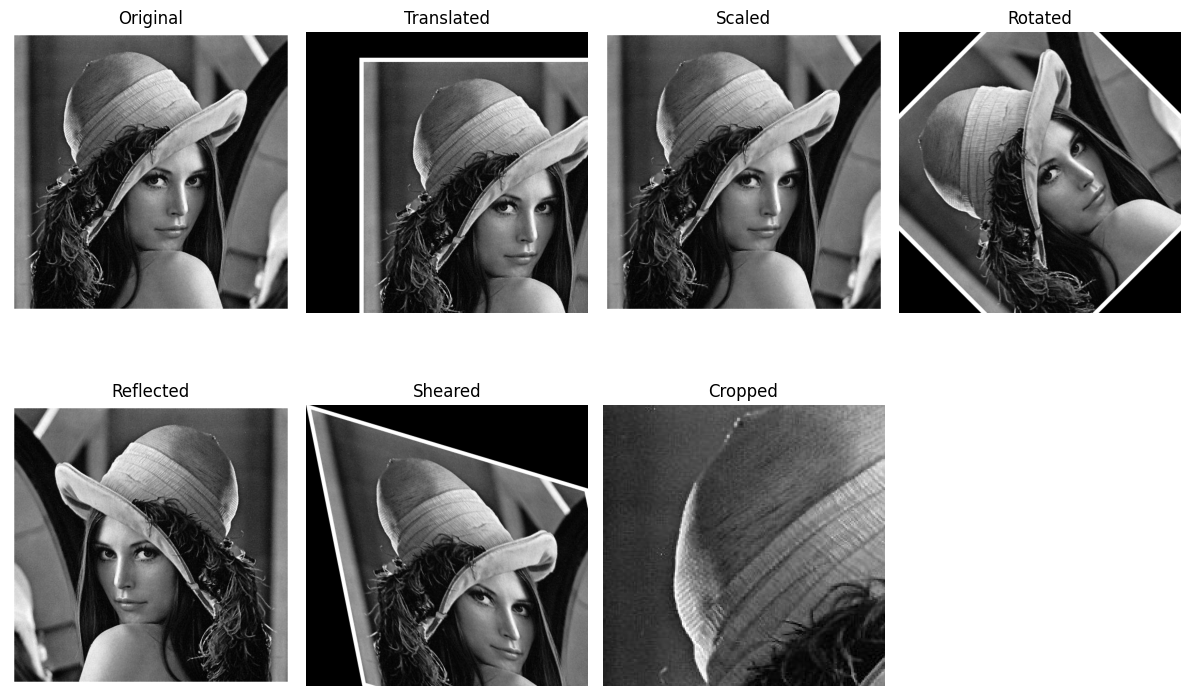

In [ ]:
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


from google.colab import files
uploaded = files.upload()


image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(h, w) = image.shape[:2]


def translate_image(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (w, h))


def scale_image(image, sx, sy):
    return cv2.resize(image, (0, 0), fx=sx, fy=sy)

def rotate_image(image, angle):
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (w, h))

def reflect_image(image, axis='x'):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

def shear_image(image, shx=0, shy=0):
    shearing_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, shearing_matrix, (w, h))

def crop_image(image, x, y, width, height):
    return image[y:y+height, x:x+width]

translated = translate_image(image, 100, 50)
scaled = scale_image(image, 0.5, 0.5)
rotated = rotate_image(image, 45)
reflected = reflect_image(image, axis='y')
sheared = shear_image(image, shx=0.2, shy=0.3)
cropped = crop_image(image, 50, 50, 200, 200)

plt.figure(figsize=(12, 8))

titles = ['Original', 'Translated', 'Scaled', 'Rotated', 'Reflected', 'Sheared', 'Cropped']
images = [image, translated, scaled, rotated, reflected, sheared, cropped]

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
